<a href="https://colab.research.google.com/github/ajinkyajumde/python-basics/blob/main/Singular_Value_Decomposition_for_Img_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import cv2
import os


In [53]:
image=image.load_img('/content/drive/MyDrive/Almabetter projects/cnn/Screenshot 2022-08-31 193939.jpg')

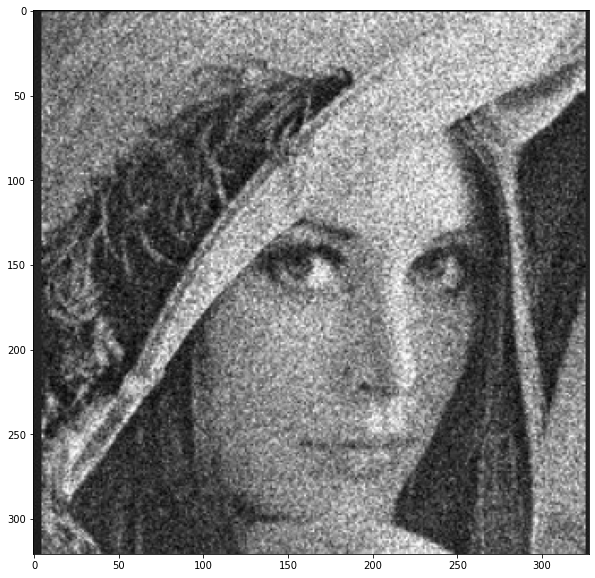

In [54]:
plt.figure(figsize=(20, 10))
plt.imshow(image)

In [55]:
img=cv2.imread('/content/drive/MyDrive/Almabetter projects/cnn/Screenshot 2022-08-31 193939.jpg')

In [56]:
img

array([[[ 34,  34,  34],
        [ 30,  30,  30],
        [ 26,  26,  26],
        ...,
        [ 32,  32,  32],
        [ 30,  30,  30],
        [ 35,  35,  35]],

       [[ 27,  27,  27],
        [ 32,  32,  32],
        [ 35,  35,  35],
        ...,
        [206, 206, 206],
        [ 31,  31,  31],
        [ 27,  27,  27]],

       [[ 29,  29,  29],
        [ 31,  31,  31],
        [ 34,  34,  34],
        ...,
        [214, 214, 214],
        [ 30,  30,  30],
        [ 36,  36,  36]],

       ...,

       [[ 28,  28,  28],
        [ 30,  30,  30],
        [ 28,  28,  28],
        ...,
        [ 87,  87,  87],
        [ 35,  35,  35],
        [ 25,  25,  25]],

       [[ 27,  27,  27],
        [ 33,  33,  33],
        [ 30,  30,  30],
        ...,
        [ 88,  88,  88],
        [ 26,  26,  26],
        [ 33,  33,  33]],

       [[ 29,  29,  29],
        [ 29,  29,  29],
        [ 29,  29,  29],
        ...,
        [ 89,  89,  89],
        [ 29,  29,  29],
        [ 29,  29,  29]]

In [57]:
img.shape

(321, 328, 3)

In [58]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [59]:
gray_image

array([[ 34,  30,  26, ...,  32,  30,  35],
       [ 27,  32,  35, ..., 206,  31,  27],
       [ 29,  31,  34, ..., 214,  30,  36],
       ...,
       [ 28,  30,  28, ...,  87,  35,  25],
       [ 27,  33,  30, ...,  88,  26,  33],
       [ 29,  29,  29, ...,  89,  29,  29]], dtype=uint8)

In [60]:
u, s, v = np.linalg.svd(gray_image, full_matrices=False)

In [61]:
u.shape

(321, 321)

variance Explained by Top 20 singular values:
[8.74125e-01 1.98810e-02 1.90230e-02 1.33820e-02 7.66300e-03 5.87000e-03
 5.55200e-03 4.02300e-03 2.99400e-03 2.43300e-03 2.36900e-03 2.05800e-03
 2.03100e-03 1.47000e-03 1.17600e-03 1.11900e-03 1.03500e-03 9.75000e-04
 8.84000e-04 8.66000e-04]


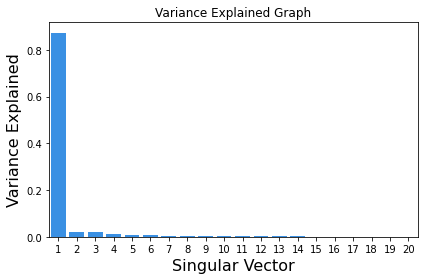

In [62]:
import seaborn as sns
 
var_explained = np.round(s**2/np.sum(s**2), decimals=6)
 
# Variance explained top Singular vectors
print(f'variance Explained by Top 20 singular values:\n{var_explained[0:20]}')
 
sns.barplot(x=list(range(1, 21)),
            y=var_explained[0:20], color="dodgerblue")
 
plt.title('Variance Explained Graph')
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('Variance Explained', fontsize=16)
plt.tight_layout()
plt.show()

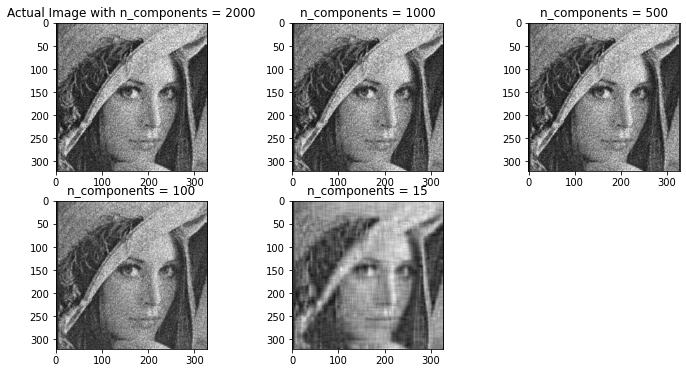

In [66]:
comps = [2000, 1000, 500, 100, 15]
plt.figure(figsize=(12, 6))
 
for i in range(len(comps)):
    low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i], :]
     
    if(i == 0):
        plt.subplot(2, 3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'Actual Image with n_components = {comps[i]}')
     
    else:
        plt.subplot(2, 3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'n_components = {comps[i]}')

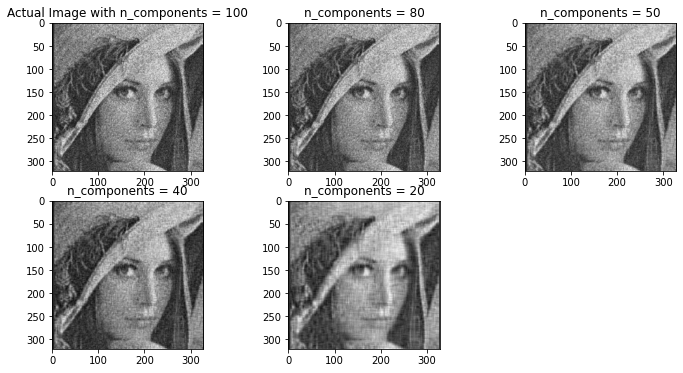

In [75]:
comps = [100, 80, 50, 40, 20]
plt.figure(figsize=(12, 6))
 
for i in range(len(comps)):
    low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i], :]
     
    if(i == 0):
        plt.subplot(2, 3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'Actual Image with n_components = {comps[i]}')
     
    else:
        plt.subplot(2, 3, i+1),
        plt.imshow(low_rank, cmap='gray'),
        plt.title(f'n_components = {comps[i]}')

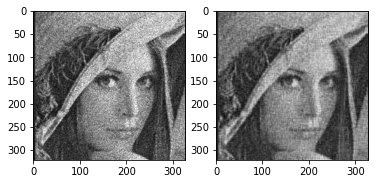

In [76]:
plt.subplot(1, 2,1)
plt.imshow(image)
plt.subplot(1, 2,2)
low_rank = u[:, :40] @ np.diag(s[:40]) @ v[:40, :]
plt.imshow(low_rank, cmap='gray')